# LungsNet: Exploratory Data Analysis (EDA)
This notebook covers the Data Understanding and Preprocessing visualization steps of the Data Mining workflow.

## Objectives:
1.  **Class Distribution**: Check for data imbalance.
2.  **Sample Visualization**: Visual inspection of Normal vs Pneumonia X-Rays.
3.  **Pixel Intensity Analysis**: Compare average brightness/intensity between classes.
4.  **Image Dimension Analysis**: Verify image sizes.

In [19]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# Set style
plt.style.use('ggplot')
sns.set_palette("husl")

## 1. Load Data Paths

In [20]:
DATA_DIR = "../data/balanced"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
TEST_DIR = os.path.join(DATA_DIR, "test")
VAL_DIR = os.path.join(DATA_DIR, "val")

# Get all image paths (recursively or specifically)
# Combining multiple extensions used in dataset
train_normal = []
train_pneumonia = []

for ext in ['*.jpeg', '*.jpg', '*.png']:
    train_normal.extend(glob(os.path.join(TRAIN_DIR, "NORMAL", ext)))
    train_pneumonia.extend(glob(os.path.join(TRAIN_DIR, "PNEUMONIA", ext)))

print(f"Normal Training Images: {len(train_normal)}")
print(f"Pneumonia Training Images: {len(train_pneumonia)}")

Normal Training Images: 3892
Pneumonia Training Images: 3875


## 2. Class Distribution Analysis
Checking if the dataset is balanced is crucial for model training.

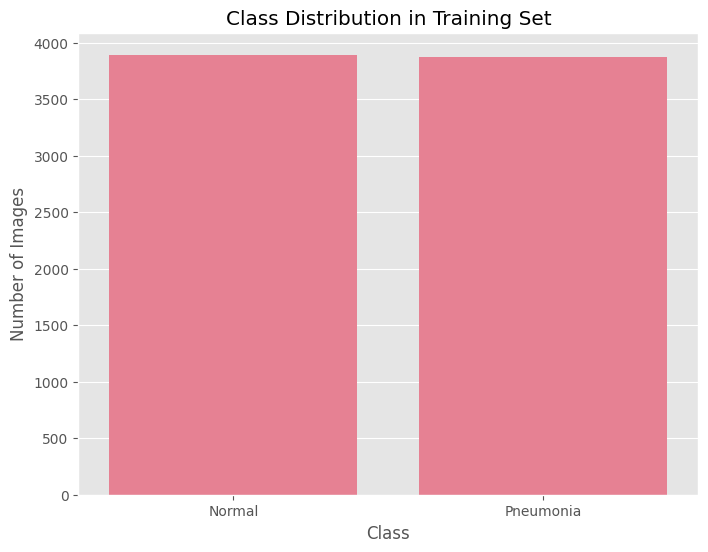

In [21]:
data = {
    'Class': ['Normal', 'Pneumonia'],
    'Count': [len(train_normal), len(train_pneumonia)]
}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='Count', data=df)
plt.title('Class Distribution in Training Set')
plt.ylabel('Number of Images')
plt.show()

**Observation**: The dataset should now be balanced after running the robust augmentation script in `01_Data_Acquisition.ipynb`.

## 3. Sample Visualization
Let's look at what the model actually sees.

Normal Cases:


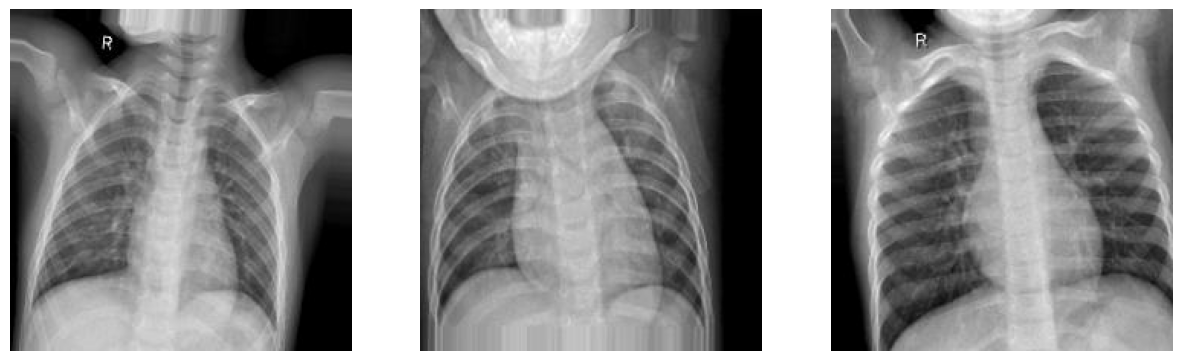

Pneumonia Cases:


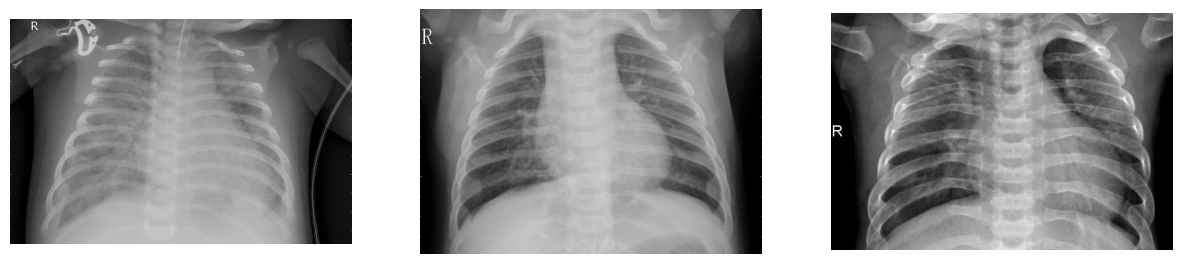

In [22]:
print("Normal Cases:")
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, img_path in enumerate(train_normal[:3]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

print("Pneumonia Cases:")
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, img_path in enumerate(train_pneumonia[:3]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

## 4. Pixel Intensity Analysis
Checking for brightness differences.

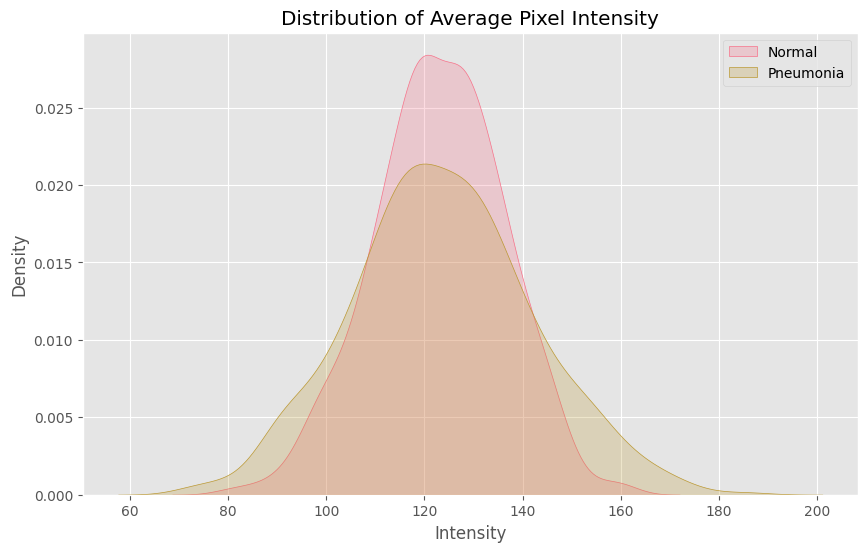

In [23]:
def get_avg_intensity(image_paths):
    intensities = []
    for img_path in image_paths[:500]: # Sample 500 images for speed
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        intensities.append(img.mean())
    return intensities

normal_intensity = get_avg_intensity(train_normal)
pneumonia_intensity = get_avg_intensity(train_pneumonia)

plt.figure(figsize=(10, 6))
sns.kdeplot(normal_intensity, label='Normal', fill=True)
sns.kdeplot(pneumonia_intensity, label='Pneumonia', fill=True)
plt.title('Distribution of Average Pixel Intensity')
plt.xlabel('Intensity')
plt.legend()
plt.show()